In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
loan_data = pd.read_excel("loandataset.xlsx")
customer_data = pd.read_csv("customer_data.csv", sep = ";")

In [17]:
customer_data

,id,first_name,last_name,email,gender,city,country
0,C1,Rafaelia,Constable,rconstable0@google.co.jp,Female,Kazanskoye,Russia
1,C2,Rayner,Langhor,rlanghor1@arstechnica.com,Male,Yauca,Peru
2,C3,Felike,Duchesne,fduchesne2@blog.com,Male,Monte Santo de Minas,Brazil
3,C4,Kelli,Winchcomb,kwinchcomb3@tuttocitta.it,Female,Červené Pečky,Czech Republic
4,C5,Timi,Butterley,tbutterley4@jalbum.net,Female,Lorino,Russia
...,...,...,...,...,...,...,...
995,C996,Gage,Minear,gminearrn@europa.eu,Male,Hufeng,China
996,C997,Karol,Hulles,khullesro@sciencedirect.com,Female,Thị Trấn Lâm,Vietnam
997,C998,Wynnie,Peverell,wpeverellrp@creativecommons.org,Female,'s-Hertogenbosch,Netherlands
998,C999,Caz,Fryatt,cfryattrq@census.gov,Male,Keruguya,Kenya


In [19]:
loan_data

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,50,0.3,0,0,0,0
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,50,0.3,0,0,0,0
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,2751,16.7,0,0,0,0
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,17214,8.1,2,1,0,0
4,93,C93,1,debt_consolidation,0.0870,383.87,11.918391,4.80,767,13349.958330,61921,39.1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,591,84.4,3,0,0,0
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,1061,81.9,3,0,0,0
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,566,51.5,3,1,0,1
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1


# Merging customer and loan dfs on customer_id

In [31]:
complete_data = pd.merge(loan_data, customer_data, left_on = 'customerid', right_on = 'id')

In [112]:
complete_data.head()

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,pub.rec,not.fully.paid,id,first_name,last_name,email,gender,city,country,Purpose_Category
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.04167,...,0,0,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal,Financial
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.00000,...,0,0,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal,Financial
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.00000,...,0,0,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia,Other
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.95833,...,0,0,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan,Educational/Business
5,503,C503,1,credit_card,0.0832,160.57,10.985293,7.08,767,13319.04167,...,0,0,C503,Dorena,Keely,dkeelydy@alibaba.com,Female,Oued Lill,Tunisia,Financial


# Check for missing data

In [114]:
complete_data.isnull().sum()

loan id              0
customerid           0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
id                   0
first_name           0
last_name            0
email                0
gender               0
city                 0
country              0
Purpose_Category     0
dtype: int64

In [38]:
complete_data = complete_data.dropna()

In [40]:
complete_data.isnull().sum()

loan id              0
customerid           0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
id                   0
first_name           0
last_name            0
email                0
gender               0
city                 0
country              0
dtype: int64

# Check for duplicated dta

In [47]:
complete_data.duplicated().sum()

0

# Define a function to categorize purpose into broader categories


    

In [106]:
def categorize_purpose(purpose):
    if purpose in ['credit_card', 'debt_consolidation']:
        return 'Financial'
    elif purpose in ['educational', 'small_business']:
        return 'Educational/Business'
    else:
        return 'Other'
    

In [108]:
complete_data["Purpose_Category"] = complete_data['purpose'].apply(categorize_purpose)

In [110]:
complete_data

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,pub.rec,not.fully.paid,id,first_name,last_name,email,gender,city,country,Purpose_Category
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,...,0,0,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal,Financial
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,...,0,0,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal,Financial
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,...,0,0,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia,Other
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,...,0,0,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan,Educational/Business
5,503,C503,1,credit_card,0.0832,160.57,10.985293,7.08,767,13319.041670,...,0,0,C503,Dorena,Keely,dkeelydy@alibaba.com,Female,Oued Lill,Tunisia,Financial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,...,0,0,C20,Krissy,Chamberlayne,kchamberlaynej@dion.ne.jp,Bigender,Liufu,China,Other
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,...,0,0,C109,Christophorus,Mackrill,cmackrill30@nyu.edu,Male,Cha’anpu,China,Other
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,...,0,1,C141,Quillan,Pinckney,qpinckney3w@msn.com,Male,Storozhevaya,Russia,Educational/Business
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,...,0,1,C66,Alyse,Kobpa,akobpa1t@trellian.com,Female,Cojata,Peru,Other


# Create a function that checks whether the burrower is in high risk or low risk

In [145]:
def assess_risk(row):
    if row['dti'] > 20 and row['delinq.2yrs'] > 2 and row['revol.util'] > 60:
        return 'High Risk'
    else:
        return 'Low Risk'

In [136]:
complete_data['Risk'] = complete_data.apply(assess_risk, axis = 1)

In [140]:
complete_data[complete_data['Risk'] == 'High Risk']

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,not.fully.paid,id,first_name,last_name,email,gender,city,country,Purpose_Category,Risk
78,548,C548,1,credit_card,0.1482,587.82,11.552146,20.12,667,8250.041667,...,0,C548,Marve,Rhodef,mrhodeff7@freewebs.com,Male,Igbeti,Nigeria,Financial,High Risk


# Create a function to categorize FICO scores

In [150]:
def categorize_function(fico_score):
    if fico_score >= 800 and fico_score <= 850:
        return 'Excellent'
    elif fico_score >= 740 and fico_score < 800:
        return 'Very Good'
    elif fico_score >= 670 and fico_score < 740:
        return 'Good'
    elif fico_score >= 580 and fico_score <= 670:
        return 'Fair'
    else:
        return 'Poor'
    

In [154]:
complete_data['Fico_category'] = complete_data['fico'].apply(categorize_function)

In [156]:
complete_data

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,id,first_name,last_name,email,gender,city,country,Purpose_Category,Risk,Fico_category
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,...,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal,Financial,Low Risk,Excellent
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,...,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal,Financial,Low Risk,Excellent
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,...,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia,Other,Low Risk,Very Good
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,...,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan,Educational/Business,Low Risk,Very Good
5,503,C503,1,credit_card,0.0832,160.57,10.985293,7.08,767,13319.041670,...,C503,Dorena,Keely,dkeelydy@alibaba.com,Female,Oued Lill,Tunisia,Financial,Low Risk,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,...,C20,Krissy,Chamberlayne,kchamberlaynej@dion.ne.jp,Bigender,Liufu,China,Other,Low Risk,Fair
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,...,C109,Christophorus,Mackrill,cmackrill30@nyu.edu,Male,Cha’anpu,China,Other,Low Risk,Fair
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,...,C141,Quillan,Pinckney,qpinckney3w@msn.com,Male,Storozhevaya,Russia,Educational/Business,Low Risk,Fair
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,...,C66,Alyse,Kobpa,akobpa1t@trellian.com,Female,Cojata,Peru,Other,Low Risk,Good


# Identify with customers with more than average inquiries and derogatory records with a function

In [175]:
def identify_high_inq_derog(row):
    avg_inq = complete_data['inq.last.6mths'].mean()
    avg_derog = complete_data['pub.rec'].mean()

    if row['inq.last.6mths'] > avg_inq and row['pub.rec'] > avg_derog:
        return True
    else:
        return False

In [177]:
complete_data['High_Inquiries_and_Public_Records'] = complete_data.apply(identify_high_inq_derog, axis = 1)

In [181]:
complete_data['High_Inquiries_and_Public_Records'].value_counts()

High_Inquiries_and_Public_Records
False    958
True      30
Name: count, dtype: int64

# Data visualization

# Bar plot to show distributions of loans by purpose


C:\Users\Sanila\AppData\Local\Temp\ipykernel_14864\4242216365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'purpose', data = complete_data, palette = 'dark')


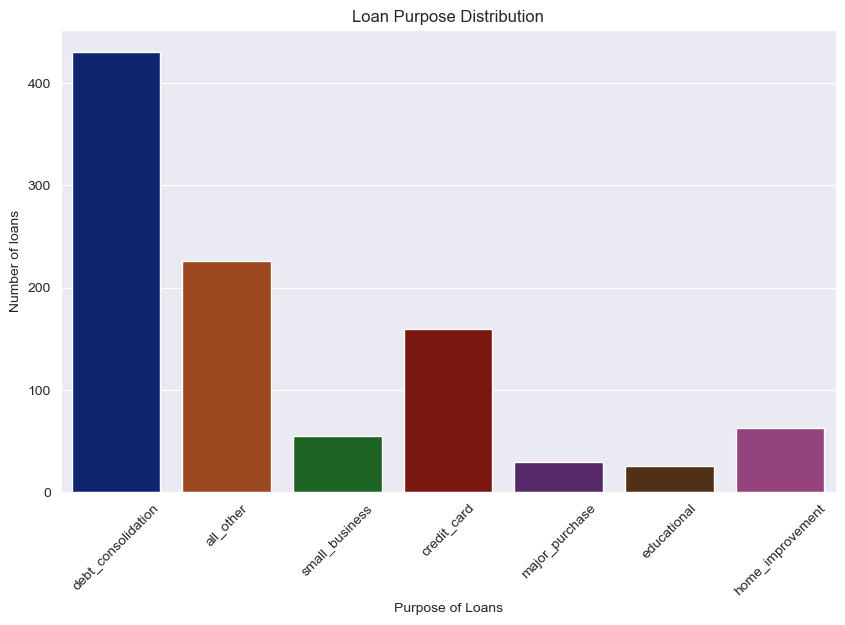

In [203]:
sns.set_style('darkgrid')
plt.figure(figsize= (10,6))
sns.countplot(x = 'purpose', data = complete_data, palette = 'dark')
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose of Loans')
plt.ylabel('Number of loans')
plt.xticks(rotation = 45)
plt.show()

# Create a scatterplot for 'dti' vs 'Income'

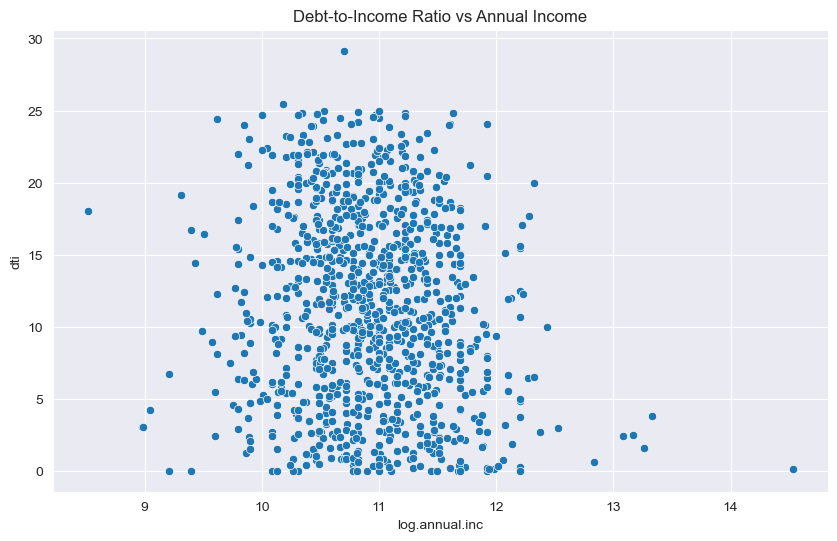

In [210]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'log.annual.inc', y = 'dti', data = complete_data)
plt.title('Debt-to-Income Ratio vs Annual Income')
plt.show()

# Distribution of FICO scores


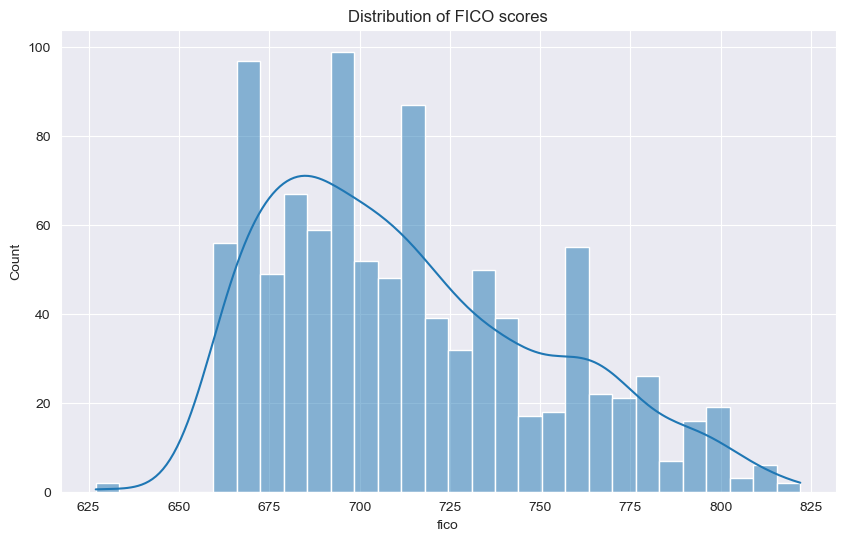

In [217]:
plt.figure(figsize=(10,6))
sns.histplot(complete_data['fico'], bins = 30, kde = True)
plt.title('Distribution of FICO scores')
plt.show()

# Box plot to determine risk vs interest rate


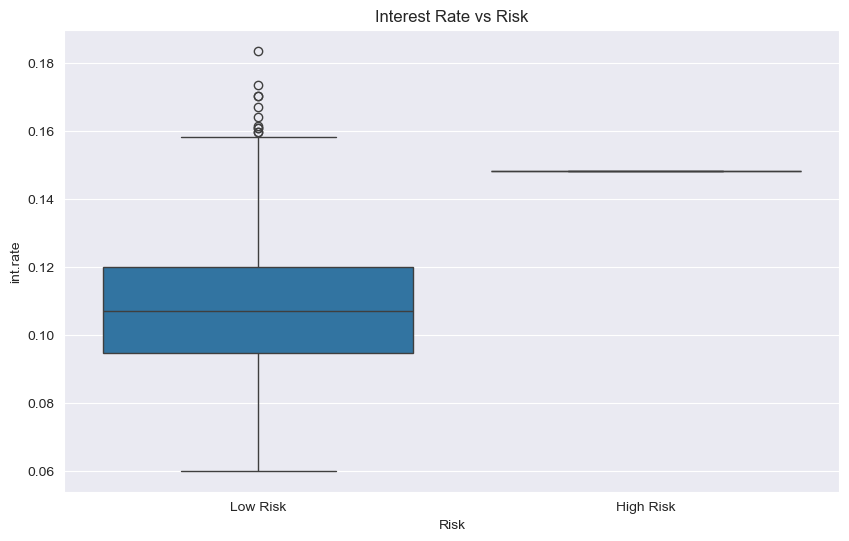

In [224]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Risk', y = 'int.rate', data = complete_data)
plt.title('Interest Rate vs Risk')
plt.show()